_________________________________________________________________________________________________________________________________________________________
## <b><h1><center>Market and Credit Risk Analysis: Coursework</center></h1></b>
#### Name: KITTIWORAWAT Thanapon
#### Student Identification: 243664 (22115632)
#### Module Convenor(s): Professor Lu Li and Professor Ding Chen
#### Words Count: ____ words (maximum 1,500)
#### Due Date: Thursday 17th March 2022 16.00UTC (Week 8)
_________________________________________________________________________________________________________________________________________________________

### Abstract

In [1]:
import pandas as pd
#!pip install pandas-datareader
from pandas_datareader import DataReader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
from matplotlib.pyplot import figure
%matplotlib inline
#!pip install scipy
import scipy as sc
from scipy.stats import norm, chi2
import math
from math import ceil
#!pip install patsy
import patsy as pt
#!pip install numdifftools
import numdifftools as nd
import yfinance as yf
import statistics
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels import stats
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
#!pip install mitoinstaller
import mitosheet
import seaborn as sns
import random
from random import gauss
from random import seed
#!pip install arch
from arch import arch_model
from arch.__future__ import reindexing
#!pip install pyflux
#import pyflux as pf
#!pip install datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")
#!pip install backtrader
import backtrader as bt
#!pip install strategies
from strategies import *


##### Download Data from Yahoo! Finance
[Click here for Hang Seng Index Historical Data](https://finance.yahoo.com/quote/%5EHSI/history?period1=1293840000&period2=1640908800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) (1st Jan 2011 to 31st Dec 2021) (Data collection: daily)

In [4]:
# Downloading Data of HANG SENG INDEX (^HSI) from Yahoo Finance

hs = yf.download('^HSI', start='2011-01-01', end='2021-12-31') #2707 days span (market opens)
#hs.describe(include="all")
hs

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,23135.640625,23443.529297,23057.519531,23436.050781,23436.050781,1066929900
2011-01-04,23477.310547,23695.609375,23408.089844,23668.480469,23668.480469,1330693400
2011-01-05,23650.179688,23773.980469,23579.740234,23757.820312,23757.820312,1277768100
2011-01-06,23861.220703,23861.220703,23698.380859,23786.300781,23786.300781,1147689000
2011-01-07,23744.029297,23880.769531,23654.039062,23686.630859,23686.630859,1287345900
...,...,...,...,...,...,...
2021-12-23,23141.789062,23264.750000,23027.150391,23193.640625,23193.640625,1387904000
2021-12-24,23375.990234,23383.189453,23186.570312,23223.759766,23223.759766,622879700
2021-12-28,23282.349609,23319.439453,23099.480469,23280.560547,23280.560547,1433026700


##### Calculate Log Return

In [3]:
hs['Index'] = hs['Adj Close']
hs['Log_return'] = np.log(hs.Index/hs.Index.shift(1))
hs['Log_price'] = np.log(hs.Index)
dropped_hs = hs.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Log_price', 'Adj Close'], axis = 1)
dropna_hs = dropped_hs.dropna()
dropna_hs.head(10)

,Index,Log_return
Date,,
2011-01-04,23668.480469,0.009869
2011-01-05,23757.820312,0.003768
2011-01-06,23786.300781,0.001198
2011-01-07,23686.630859,-0.004199
2011-01-10,23527.259766,-0.006751
2011-01-11,23760.339844,0.009858
2011-01-12,24125.609375,0.015256
2011-01-13,24238.980469,0.004688
2011-01-14,24283.230469,0.001824


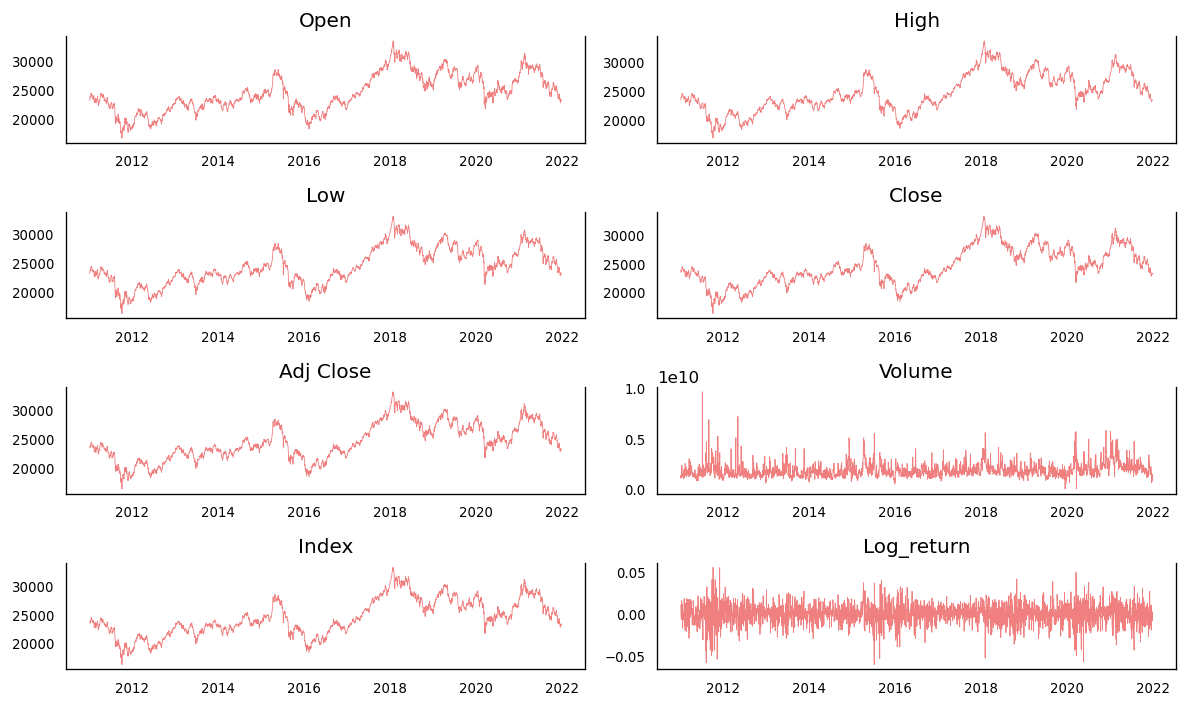

In [4]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, dpi = 120, figsize = (10, 6))
for i, ax in enumerate(axes.flatten()):
    data = hs[hs.columns[i]]
    ax.plot(data, color = 'lightcoral', linewidth = 0.5)
    ax.set_title(hs.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize = 8)

plt.tight_layout()

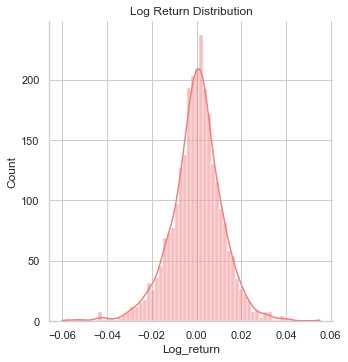

In [5]:
sns.set_theme(style="whitegrid")
sns.displot(dropna_hs.Log_return, kde=True, color = "lightcoral").set(title = "Log Return Distribution")
#rcParams['figure.figsize'] = 30,30

##### Use GARCH(1, 1) model to estimate the volatility of returns (15 marks)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 287296.97305224935
Iteration:      2,   Func. Count:     66,   Neg. LLF: 12207.40826242019
Iteration:      3,   Func. Count:     99,   Neg. LLF: 1268255.125105186
Iteration:      4,   Func. Count:    132,   Neg. LLF: 1988982.2116249988
Iteration:      5,   Func. Count:    165,   Neg. LLF: 824780.1194134338
Iteration:      6,   Func. Count:    198,   Neg. LLF: 217950.68660456495
Iteration:      7,   Func. Count:    231,   Neg. LLF: 49571.042490805805
Iteration:      8,   Func. Count:    264,   Neg. LLF: 16099.10680858595
Iteration:      9,   Func. Count:    297,   Neg. LLF: 566892.6929337922
Iteration:     10,   Func. Count:    330,   Neg. LLF: 11479.972428478419
Iteration:     11,   Func. Count:    363,   Neg. LLF: 10264.973686449459
Iteration:     12,   Func. Count:    396,   Neg. LLF: 10128.326905715441
Iteration:     13,   Func. Count:    429,   Neg. LLF: 10066.885662571385
Iteration:     14,   Func. Count:    462,   Neg. LLF: 21

C:\Users\TK\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


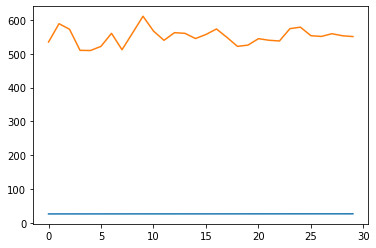

In [5]:
#create dataset
data = [gauss(0, i*0.01) for i in range(0,2707)]
#split into train/test
n_test=30
train, test = data[:-n_test], data[-n_test:]

#define model
model = arch_model(train, mean = "Zero", vol = 'GARCH', p = 15, q = 15)

#seed pseudorandom number generator
seed(1)

#define model
garch = arch_model(train, mean = "Zero", vol = 'GARCH', p = 15, q = 15)

#fit model
garch_fit = garch.fit()
#forecast the test set
yhat = garch_fit.forecast(horizon = n_test)
#plot the actual variance
var = [i*0.01 for i in range(0,2707)]
plt.plot(var[-n_test:])
#plot forecast variance
plt.plot(yhat.variance.values[-1, :])
#figure(figsize=(3, 3), dpi=15)
plt.show()

In [6]:
model = arch_model(
    dropna_hs.Log_return,mean = "Zero", vol = 'GARCH', p = 1, q = 1
)
x = model.fit()
x.summary()

Iteration:      1,   Func. Count:      4,   Neg. LLF: -8328.128289244096
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8328.12829404937
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8328.13
Distribution:                  Normal   AIC:                          -16650.3
Method:            Maximum Likelihood   BIC:                          -16632.5
                                        No. Observations:                 2706
Date:                Thu, Mar 17 2022   Df Residuals:                     2706
Time:                        09:47:06   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8089e-06  1.593e-11  1.763e+05      0.000 [2.809e-06,2.809e-06]
alpha[1]       0.0500  1.308e-04    382.303      0.000 [4.974e-02,5.026e-02]
beta[1]        0.9300  2.416e-03    384.977      0.000     [  0.925,  0.935]
============================================================================

Covariance estimator: robust
"""

In [7]:
# 5 days ahead predictions
predictions = x.forecast(horizon=5) # outputs dataframe of predictions
predictions.variance


,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2021-12-30,0.000113,0.000113,0.000114,0.000114,0.000115


In [8]:
x.forecast(horizon=5,method='simulation').residual_variance

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2021-12-30,0.000113,0.000113,0.000114,0.000115,0.000115


##### Calculate the 1-day 1% VaR during the stock market crash of 2020 by using volatility estimates in GARCH(1, 1), using RiskMetrics method with Lambda = 0.94; and Historical Simulation method. Use a 250-day moving window. (45 marks)

In [9]:
#1-day VaR at 1% significant level with GARCH

dropna_hs = dropna_hs.copy()
dropna_hs['prev_index'] = dropna_hs.Index.shift(1) # Close of Previous Day
dropna_hs['garch_variance'] = x.forecast(start=dropna_hs.index[0]).variance
dropna_hs["GARCH_VaR"] = dropna_hs.apply(
    lambda row: norm(loc=0, scale=row["garch_variance"] ** 0.5).ppf(0.01)
    * row["prev_index"],
    axis=1,
) # VaR calculations
dropna_hs

,Index,Log_return,prev_index,garch_variance,GARCH_VaR
Date,,,,,
2011-01-04,23668.480469,0.009869,NaN,0.000086,NaN
2011-01-05,23757.820312,0.003768,23668.480469,0.000084,-503.813996
2011-01-06,23786.300781,0.001198,23757.820312,0.000081,-496.633967
2011-01-07,23686.630859,-0.004199,23786.300781,0.000079,-491.152209
2011-01-10,23527.259766,-0.006751,23686.630859,0.000078,-487.766677
...,...,...,...,...,...
2021-12-23,23193.640625,0.003945,23102.330078,0.000132,-617.995911
2021-12-24,23223.759766,0.001298,23193.640625,0.000126,-605.326711
2021-12-28,23280.560547,0.002443,23223.759766,0.000120,-592.221395


In [10]:
model = arch_model(
    dropna_hs.Log_return,mean = "Zero", vol = 'GARCH', p = 1, q = 1
)
x = model.fit()
x.summary()

Iteration:      1,   Func. Count:      4,   Neg. LLF: -8328.128289244096
Optimization terminated successfully    (Exit mode 0)
            Current function value: -8328.12829404937
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8328.13
Distribution:                  Normal   AIC:                          -16650.3
Method:            Maximum Likelihood   BIC:                          -16632.5
                                        No. Observations:                 2706
Date:                Thu, Mar 17 2022   Df Residuals:                     2706
Time:                        09:47:21   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8089e-06  1.593e-11  1.763e+05      0.000 [2.809e-06,2.809e-06]
alpha[1]       0.0500  1.308e-04    382.303      0.000 [4.974e-02,5.026e-02]
beta[1]        0.9300  2.416e-03    384.977      0.000     [  0.925,  0.935]
============================================================================

Covariance estimator: robust
"""

In [11]:
#1-day VaR at 1% significant level with Risk Matrics

def RiskMetrics (lamb_da):
    lamb_da = 0.94
    int_sigma = 0
    RM_var = [dropna_hs.Log_return.var()]
    for i in range(1,len(dropna_hs.Log_return)):
        RM_var.append((1-lamb_da)*(dropna_hs.Log_return.iloc[i-1]**2) + (lamb_da * RM_var[i-1]))
    return RM_var

RiskMetrics_Variance = RiskMetrics(.94)
dropna_hs['RM_var'] = RiskMetrics_Variance
dropna_hs["RM_VaR"] = dropna_hs.apply(
    lambda row: norm(loc=0, scale=row["RM_var"] ** 0.5).ppf(0.01)
    * row["prev_index"],
    axis=1,
)       

In [12]:
#1-day VaR at 1% significant level with Historical Simulation

dropna_hs['HS_VaR'] = dropna_hs.Log_return.rolling(window=250).quantile(.01)*dropna_hs.Index.shift(1)
HSI = dropna_hs.copy()
HSI['PnL'] = HSI.Log_return * HSI.Index.shift(1)
HSI=HSI.drop(['prev_index','RM_var', 'garch_variance', 'RM_var'], axis = 1)
HSI

,Index,Log_return,GARCH_VaR,RM_VaR,HS_VaR,PnL
Date,,,,,,
2011-01-04,23668.480469,0.009869,NaN,NaN,NaN,NaN
2011-01-05,23757.820312,0.003768,-503.813996,-646.606837,NaN,89.171654
2011-01-06,23786.300781,0.001198,-496.633967,-631.338629,NaN,28.463411
2011-01-07,23686.630859,-0.004199,-491.152209,-613.054404,NaN,-99.879327
2011-01-10,23527.259766,-0.006751,-487.766677,-594.595061,NaN,-159.909660
...,...,...,...,...,...,...
2021-12-23,23193.640625,0.003945,-617.995911,-629.851461,-816.078432,91.130571
2021-12-24,23223.759766,0.001298,-605.326711,-615.289980,-819.303932,30.099601
2021-12-28,23280.560547,0.002443,-592.221395,-597.567284,-820.367876,56.731432


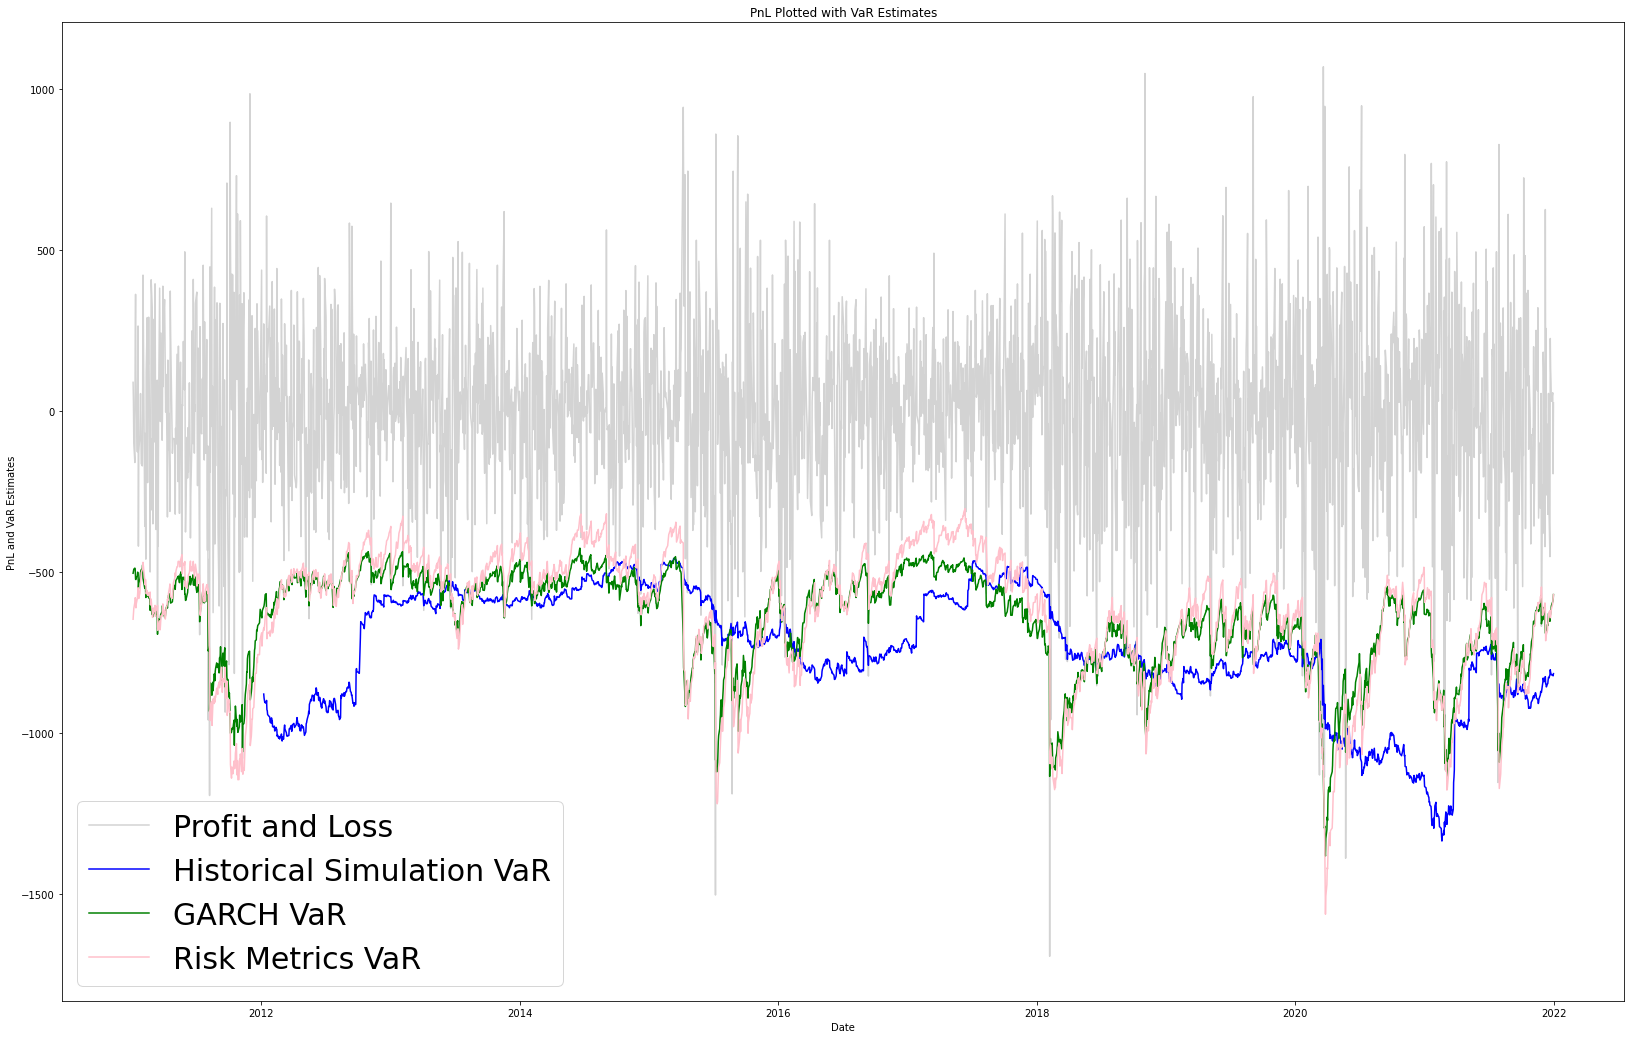

In [13]:
plt.rcParams['figure.figsize'] = 28, 18
plt.title("PnL Plotted with VaR Estimates")
plt.ylabel("PnL and VaR Estimates")
sns.lineplot(data = HSI, y = 'PnL', x = 'Date', label = 'Profit and Loss', color = 'lightgrey')
sns.lineplot(data = HSI, y = 'HS_VaR', x = 'Date', label = 'Historical Simulation VaR', color = 'blue')
sns.lineplot(data = HSI, y = 'GARCH_VaR', x = 'Date', label = 'GARCH VaR', color = 'green')
sns.lineplot(data = HSI, y = 'RM_VaR', x = 'Date', label = 'Risk Metrics VaR', color = 'pink')
plt.legend(fontsize=30)

##### Discuss which approaches produce better VaR estimates. Suport your discussion using backtesting's statistical tests (using the 1% significant level). (20 marks)

In [17]:
def Violations(df,voil_type):
    if voil_type == "GARCH":
        df['Violation_GARCH'] = df.apply(lambda row:1 if row['GARCH_VaR']>row['PnL'] else 0,axis=1)
    elif voil_type == "RM":
        df['Violation_RM'] = df.apply(lambda row:1 if row['RM_VaR']>row['PnL'] else 0,axis=1)
    else:
        df['Violation_HS'] = df.apply(lambda row:1 if row['HS_VaR']>row['PnL'] else 0,axis=1)
    return df
HSI = Violations(HSI,'GARCH')
HSI = Violations(HSI,'RM')
HSI = Violations(HSI,'HS')


def ind_test(V):
    
    J = np.full([len(V),4], 0)
    for i in range(1,len(V)-1):
        J[i,0] = (V[i-1] == 0) & (V[i] == 0)
        J[i,1] = (V[i-1] == 0) & (V[i] == 1)
        J[i,2] = (V[i-1] == 1) & (V[i] == 0)
        J[i,3] = (V[i-1] == 1) & (V[i] == 1)
    V_00 = sum(J[:,0])
    V_01 = sum(J[:,1])
    V_10 = sum(J[:,2])
    V_11 = sum(J[:,3])
    p_00=V_00/(V_00+V_01)
    p_01=V_01/(V_00+V_01)
    p_10=V_10/(V_10+V_11)
    p_11=V_11/(V_10+V_11)
    hat_p = (V_01+V_11)/(V_00+V_01+V_10+V_11)
    al = np.log(1-hat_p)*(V_00+V_10) + np.log(hat_p)*(V_01+V_11)
    bl = np.log(p_00)*V_00 + np.log(p_01)*V_01 + np.log(p_10)*V_10 + np.log(p_11)*V_11
    return (-2*(al-bl))

def bern_test(p,v):
    lv = len(v)
    sv = sum(v)
    al = np.log(p)*sv + np.log(1-p)*(lv-sv)
    bl = np.log(sv/lv)*sv + np.log(1-sv/lv)*(lv-sv)
    return (-2*(al-bl))
        
print("Historical Simulation Violation", ind_test(HSI['Violation_HS']))
print("Risk Metrics Violation", ind_test(HSI['Violation_RM']))
print("GARCH Violation", ind_test(HSI['Violation_GARCH']))
print("P Value of Independence Test of HS", LR_ind_HS)
print("P Value of Independence Test of RM", LR_ind_RM)
print("P Value of Independence Test of GARCH", LR_ind_G)
print("P Value of Bernoulli Test of HS", LR_bern_HS)
print("P Value of Bernoulli Test of RM", LR_bern_RM)
print("P Value of Bernoulli Test of GARCH", LR_bern_G)
print("P Value of Joint Test of HS", LR_joint_HS)
print("P Value of Joint Test of RM", LR_joint_RM)
print("P Value of Joint Test of GARCH", LR_joint_G)
HSI

Historical Simulation Violation 0.28579851131718215
Risk Metrics Violation 0.03286340891531836
GARCH Violation 0.5071732139871301
P Value of Independence Test of HS 0.592925609498883
P Value of Independence Test of RM 0.8561457026425859
P Value of Independence Test of GARCH 0.4763651172039375
P Value of Bernoulli Test of HS 0.03046804719115359
P Value of Bernoulli Test of RM 1.2100542789994506e-11
P Value of Bernoulli Test of GARCH 0.14220297494752954
P Value of Joint Test of HS 0.7322034779223696
P Value of Joint Test of RM 0.6517639312016288
P Value of Joint Test of GARCH 0.7339722584745043


,Index,Log_return,GARCH_VaR,RM_VaR,HS_VaR,PnL,Violation_GARCH,Violation_RM,Violation_HS
Date,,,,,,,,,
2011-01-04,23668.480469,0.009869,NaN,NaN,NaN,NaN,0,0,0
2011-01-05,23757.820312,0.003768,-503.813996,-646.606837,NaN,89.171654,0,0,0
2011-01-06,23786.300781,0.001198,-496.633967,-631.338629,NaN,28.463411,0,0,0
2011-01-07,23686.630859,-0.004199,-491.152209,-613.054404,NaN,-99.879327,0,0,0
2011-01-10,23527.259766,-0.006751,-487.766677,-594.595061,NaN,-159.909660,0,0,0
...,...,...,...,...,...,...,...,...,...
2021-12-23,23193.640625,0.003945,-617.995911,-629.851461,-816.078432,91.130571,0,0,0
2021-12-24,23223.759766,0.001298,-605.326711,-615.289980,-819.303932,30.099601,0,0,0
2021-12-28,23280.560547,0.002443,-592.221395,-597.567284,-820.367876,56.731432,0,0,0


| P-value / Estimator | Bernoulli (unconditional coverage) | Indpependence | Joint |
| -- | -- | -- | -- |
| GARCH | 0.14220297494752954 | 0.4763651172039375 | 0.7339722584745043 |
| Risk Metrics | 1.2100542789994506e-11 | 0.8561457026425859 | 0.6517639312016288 |
| Historical Simulation | 0.03046804719115359 | 0.592925609498883 | 0.7322034779223696 |

In [18]:
def LR_test (p):
    if p < 0.01:
        return "Reject"
    else:
        return "Accept"
test = {"Bernoulli": "None", "Independence": "None", "Joint": "None"}
test_type = {"GARCH": test, "Risk_Metrics": test, "Historical_Simulation": test}
test_type = pd.DataFrame(test_type)

LR_ind_HS = 1- chi2.cdf(ind_test(HSI['Violation_HS']), 1)
LR_ind_RM = 1- chi2.cdf(ind_test(HSI['Violation_RM']), 1)
LR_ind_G = 1- chi2.cdf(ind_test(HSI['Violation_GARCH']), 1)
LR_bern_HS = 1- chi2.cdf(bern_test(0.01, HSI['Violation_HS']), 1)
LR_bern_RM = 1- chi2.cdf(bern_test(0.01, HSI['Violation_RM']), 1)
LR_bern_G = 1- chi2.cdf(bern_test(0.01, HSI['Violation_GARCH']), 1)
LR_joint_HS = 1 - chi2.cdf((LR_ind_HS + LR_bern_HS), 2)
LR_joint_RM = 1 - chi2.cdf((LR_ind_RM + LR_bern_RM), 2)
LR_joint_G = 1 - chi2.cdf((LR_ind_G + LR_bern_G), 2)

print("Independence HS", LR_test(LR_ind_HS))
print("Independence RM", LR_test(LR_ind_RM))
print("Independence G", LR_test(LR_ind_G))
print("Bernoulli HS", LR_test(LR_bern_HS))
print("Bernoulli RM", LR_test(LR_bern_RM))
print("Bernoulli G", LR_test(LR_bern_G))
print("Joint HS", LR_test(LR_joint_HS))
print("Joint RM", LR_test(LR_joint_RM))
print("Joint G", LR_test(LR_joint_G))

Independence HS Accept
Independence RM Accept
Independence G Accept
Bernoulli HS Accept
Bernoulli RM Reject
Bernoulli G Accept
Joint HS Accept
Joint RM Accept
Joint G Accept


| | V00 | V01 | V10 | V11 |
|-|-|-|-|-|
| GARCH |  |  |  |  |
| Risk Metrics |  |  |  |  |
| Historical Simulation |  |  |  |  |

||Risk Metrics|GARCH|Historical Simulation|
|---|---|---|---|
|Bernoulli (unconditional coverage)|Reject|Accept|Accept|
|Independence|Accept|Accept|Accept|
|Joint|Accept|Accept|Accept|

In [19]:
#violations

#violation ratio = observed violations / expected violations
#VR: 0.8-1.2 = good, 0.5-0.8 & 1.2-1.5 = acceptible, <0.5 & >1.5 = imprecise

GARCH_VR = len(HSI[HSI.Violation_GARCH==1])/(0.01*len(HSI.Violation_GARCH))
RM_VR = len(HSI[HSI.Violation_RM==1])/(0.01*len(HSI.Violation_RM))
HS_VR = len(HSI[HSI.Violation_HS==1])/(0.01*len(HSI.Violation_HS))
print("GARCH Violation =", len(HSI[HSI.Violation_GARCH==1]))
print("RM Violation =", len(HSI[HSI.Violation_RM==1]))
print("HS Violation =", len(HSI[HSI.Violation_HS==1]))
print("Expected Violation =", (0.01*len(HSI.Violation_GARCH)))
print("GARCH Violation Ratio =", GARCH_VR)
print("Risk Metrics Violation Ratio =", RM_VR)
print("Historical Simulation Violation Ratio =", HS_VR)

GARCH Violation = 35
RM Violation = 69
HS Violation = 39
Expected Violation = 27.060000000000002
GARCH Violation Ratio = 1.293422025129342
Risk Metrics Violation Ratio = 2.549889135254989
Historical Simulation Violation Ratio = 1.441241685144124


##### Discuss how VaR estimates have performed during the evolution of the Covid-19 pandemic. (20 marks)

In [20]:
covid19 = yf.download('^HSI', start='2020-02-01', end='2020-05-31')
covid19['Index'] = covid19['Adj Close']
covid19['Log_return_covid19'] = np.log(covid19.Index/covid19.Index.shift(1))
filter_covid19 = covid19.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis = 1)
filtered_covid19 = filter_covid19.dropna()

pre_covid  = yf.download('^HSI', start = '2011-01-01', end = '2020-01-31')
post_covid = yf.download('^HSI', start = '2020-06-01', end = '2021-12-31')
no_covid = pd.concat([pre_covid, post_covid])
no_covid['Index'] = no_covid['Adj Close']
no_covid['Log_return_nocovid'] = np.log(no_covid.Index/no_covid.Index.shift(1))
filter_nocovid = no_covid.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], axis = 1)
filtered_nocovid = filter_nocovid.dropna()
filtered_nocovid = filtered_nocovid.copy()
print(filtered_covid19)
print(filtered_nocovid)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   Index  Log_return_covid19
Date                                        
2020-02-04  26675.980469            0.012030
2020-02-05  26786.740234            0.004143
2020-02-06  27493.699219            0.026050
2020-02-07  27404.269531           -0.003258
2020-02-10  27241.339844           -0.005963
...                  ...                 ...
2020-05-25  22952.240234            0.000963
2020-05-26  23384.660156            0.018665
2020-05-27  23301.359375           -0.003569
2020-05-28  23132.759766           -0.007262
2020-05-29  22961.470703           -0.007432

[80 rows x 2 columns]
                   Index  Log_return_nocovid
Date                                        
2011-01-04  23668.480469            0.009869
2011-01-05  23757.820312            0.003768
2011-

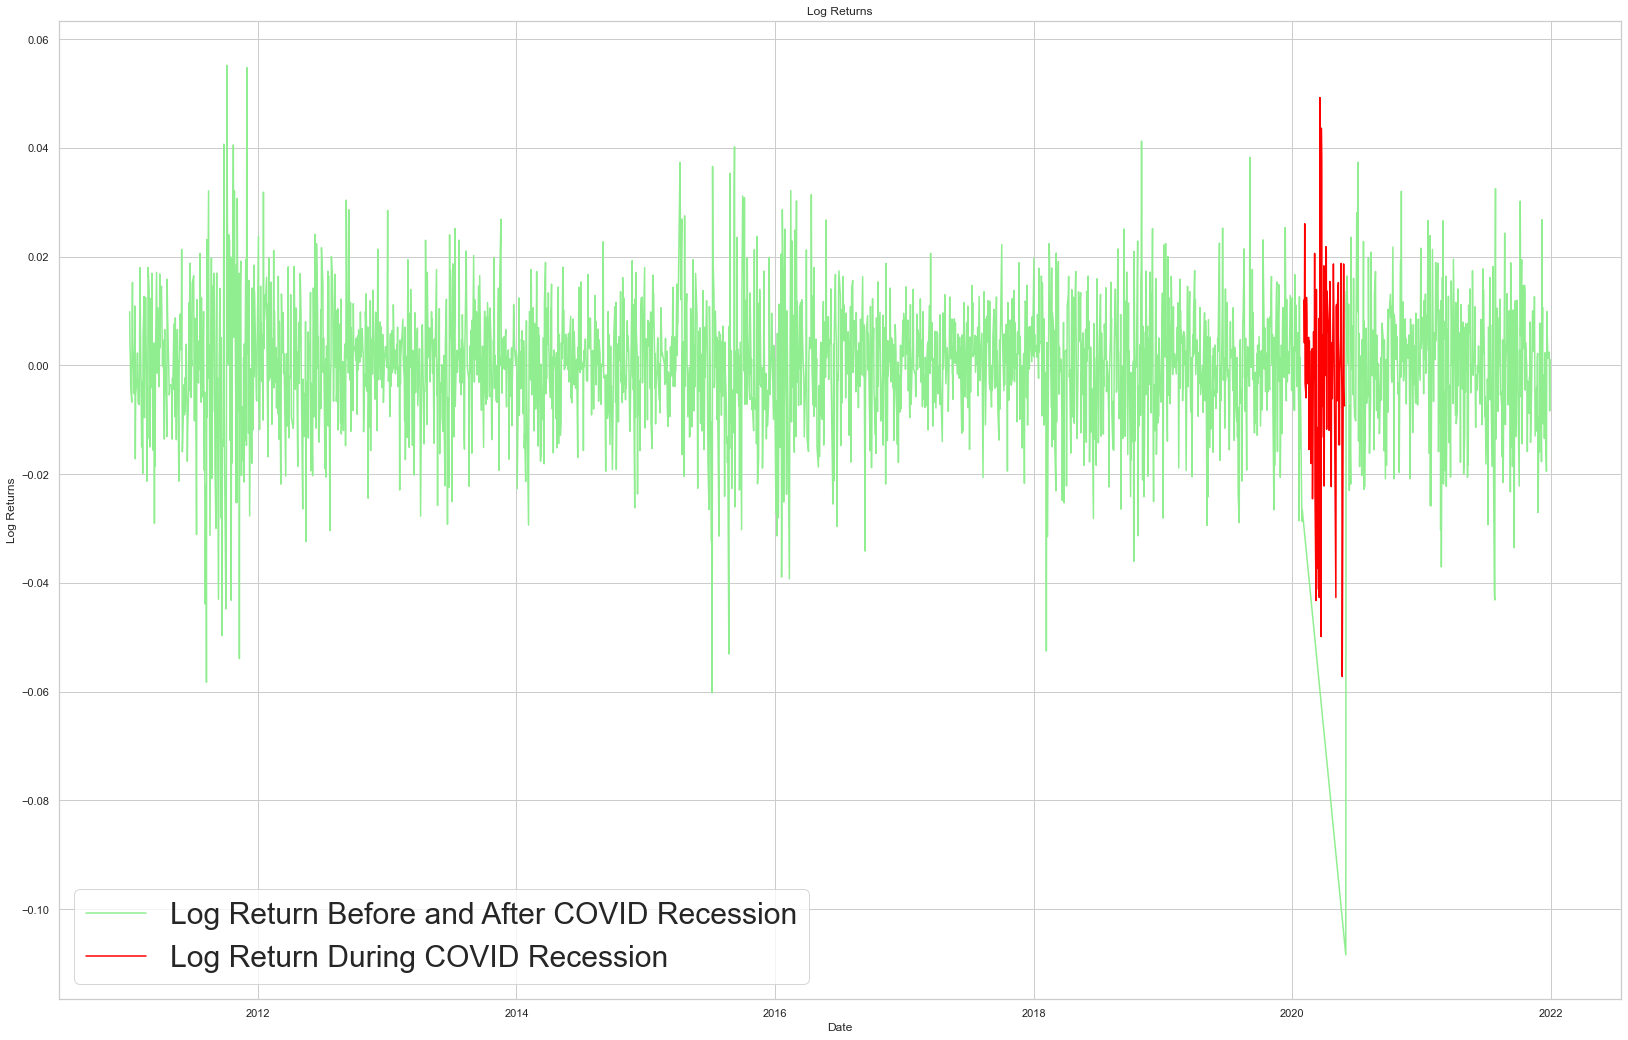

In [21]:
sns.lineplot(data = filtered_nocovid, x = 'Date', y = 'Log_return_nocovid', color = 'lightgreen').set(title = "Log Returns")
sns.lineplot(data = filtered_covid19, x = 'Date', y = 'Log_return_covid19', color = 'red').set(title = "Log Returns")
plt.ylabel('Log Returns')
plt.legend(labels=["Log Return Before and After COVID Recession","Log Return During COVID Recession"], fontsize = 30)

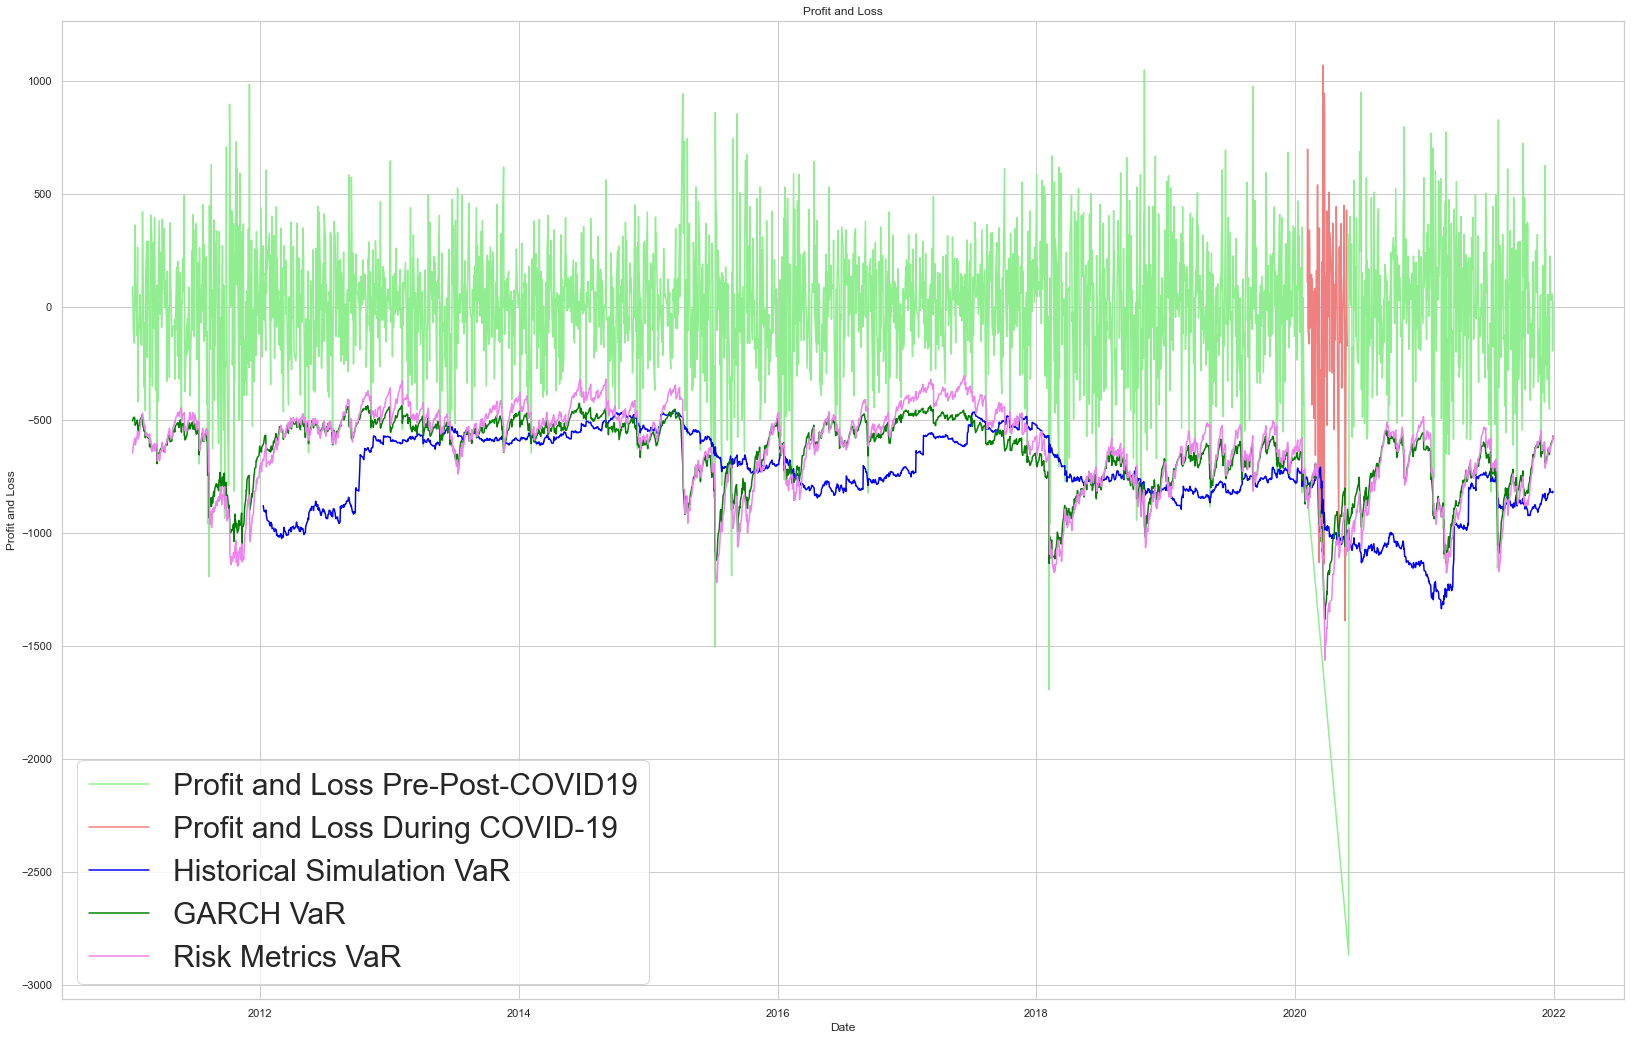

In [22]:
filtered_nocovid['PnL_nocovid'] = filtered_nocovid.Log_return_nocovid * filtered_nocovid.Index.shift(1)
filtered_covid19['PnL_covid19'] = filtered_covid19.Log_return_covid19 * filtered_covid19.Index.shift(1)
sns.lineplot(data = filtered_nocovid, y = 'PnL_nocovid', x = 'Date', label = 'Profit and Loss Pre-Post-COVID19', color = 'lightgreen').set(title = 'Profit and Loss')
sns.lineplot(data = filtered_covid19, y = 'PnL_covid19', x = 'Date', label = 'Profit and Loss During COVID-19', color = 'lightcoral')
sns.lineplot(data = HSI, y = 'HS_VaR', x = 'Date', label = 'Historical Simulation VaR', color = 'blue')
sns.lineplot(data = HSI, y = 'GARCH_VaR', x = 'Date', label = 'GARCH VaR', color = 'green')
sns.lineplot(data = HSI, y = 'RM_VaR', x = 'Date', label = 'Risk Metrics VaR', color = 'violet')
plt.ylabel('Profit and Loss')
plt.legend(fontsize=30)

In [47]:
#GARCH_VaR

filtered_nocovid['prev_index'] = filtered_nocovid.Index.shift(1) # Close of Previous Day
filtered_nocovid['garch_variance'] = x.forecast(start=filtered_nocovid.index[0]).variance
filtered_nocovid["GARCH_VaR_nocovid"] = dropna_hs.apply(
    lambda row: norm(loc=0, scale=row["garch_variance"] ** 0.5).ppf(0.01)
    * row["prev_index"],
    axis=1,
) 
filtered_covid19['prev_index'] = filtered_covid19.Index.shift(1) # Close of Previous Day
filtered_covid19['garch_variance'] = x.forecast(start=filtered_covid19.index[0]).variance
filtered_covid19["GARCH_VaR_covid19"] = dropna_hs.apply(
    lambda row: norm(loc=0, scale=row["garch_variance"] ** 0.5).ppf(0.01)
    * row["prev_index"],
    axis=1,
) 

#RM_VaR

def RiskMetrics (lamb_da):
    lamb_da = 0.94
    int_sigma = 0
    RM_var_noCOVID = [filtered_nocovid.Log_return_nocovid.var()]
    for i in range(1,len(filtered_nocovid.Log_return_nocovid)):
        RM_var_noCOVID.append((1-lamb_da)*(filtered_nocovid.Log_return_nocovid.iloc[i-1]**2) + (lamb_da * RM_var_noCOVID[i-1]))
    return RM_var_noCOVID
RiskMetrics_Variance = RiskMetrics(.94)
filtered_nocovid['RM_VaR_nocovid'] = RiskMetrics_Variance
filtered_nocovid["RM_VaR_nocovid"] = filtered_nocovid.apply(
    lambda row: norm(loc=0, scale=row["RM_VaR_nocovid"] ** 0.5).ppf(0.01)
    * row["prev_index"],
    axis=1,
)

def RiskMetrics (lamb_da):
    lamb_da = 0.94
    int_sigma = 0
    RM_var_COVID = [filtered_covid19.Log_return_covid19.var()]
    for i in range(1,len(filtered_covid19.Log_return_covid19)):
        RM_var_COVID.append((1-lamb_da)*(filtered_covid19.Log_return_covid19.iloc[i-1]**2) + (lamb_da * RM_var_COVID[i-1]))
    return RM_var_COVID
RiskMetrics_Variance = RiskMetrics(.94)
filtered_covid19['RM_VaR_covid19'] = RiskMetrics_Variance
filtered_covid19["RM_VaR_covid19"] = filtered_covid19.apply(
    lambda row: norm(loc=0, scale=row["RM_VaR_covid19"] ** 0.5).ppf(0.01)
    * row["prev_index"],
    axis=1,
)

#HS_VaR

filtered_nocovid['HS_VaR_nocovid'] = filtered_nocovid.Log_return_nocovid.rolling(window=250).quantile(.01)*filtered_nocovid.Index.shift(1)
filtered_covid19['HS_VaR_covid19'] = filtered_covid19.Log_return_covid19.rolling(window=250).quantile(.01)*filtered_covid19.Index.shift(1)

In [48]:
filtered_covid19 = filtered_covid19.drop(['prev_index', 'garch_variance'], axis = 1)
filtered_nocovid = filtered_nocovid.drop(['prev_index', 'garch_variance'], axis = 1)
no_covid19 = filtered_nocovid.copy()
covid19 = filtered_covid19.copy()
no_covid19, covid19

(                   Index  Log_return_nocovid  PnL_nocovid  GARCH_VaR_nocovid  \
 Date                                                                           
 2011-01-04  23668.480469            0.009869          NaN                NaN   
 2011-01-05  23757.820312            0.003768    89.171654        -503.813996   
 2011-01-06  23786.300781            0.001198    28.463411        -496.633967   
 2011-01-07  23686.630859           -0.004199   -99.879327        -491.152209   
 2011-01-10  23527.259766           -0.006751  -159.909660        -487.766677   
 ...                  ...                 ...          ...                ...   
 2021-12-23  23193.640625            0.003945    91.130571        -617.995911   
 2021-12-24  23223.759766            0.001298    30.099601        -605.326711   
 2021-12-28  23280.560547            0.002443    56.731432        -592.221395   
 2021-12-29  23086.539062           -0.008369  -194.834498        -588.458619   
 2021-12-30  23112.009766   

In [56]:
#violations

#violation ratio = observed violations / expected violations
#VR: 0.8-1.2 = good, 0.5-0.8 & 1.2-1.5 = acceptible, <0.5 & >1.5 = imprecise

covid19['Violation_GARCH_covid19'] = covid19.apply(lambda row:1 if row['GARCH_VaR_covid19']>row['PnL_covid19'] else 0,axis=1)
no_covid19['Violation_GARCH_nocovid'] = no_covid19.apply(lambda row:1 if row['GARCH_VaR_nocovid']>row['PnL_nocovid'] else 0,axis=1)
covid19['Violation_RM_covid19'] = covid19.apply(lambda row:1 if row['RM_VaR_covid19']>row['PnL_covid19'] else 0,axis=1)
no_covid19['Violation_RM_nocovid'] = no_covid19.apply(lambda row:1 if row['RM_VaR_nocovid']>row['PnL_nocovid'] else 0,axis=1)
covid19['Violation_HS_covid19'] = covid19.apply(lambda row:1 if row['HS_VaR_covid19']>row['PnL_covid19'] else 0,axis=1)
no_covid19['Violation_HS_nocovid'] = no_covid19.apply(lambda row:1 if row['HS_VaR_nocovid']>row['PnL_nocovid'] else 0,axis=1)
Expected_Violation_covid19 = 0.01 * (len(covid19.Violation_GARCH_covid19))
Expected_Violation_nocovid = 0.01 * (len(no_covid19.Violation_GARCH_nocovid))
GARCH_VR_covid19 = len(covid19[covid19.Violation_GARCH_covid19==1])/(0.01*len(covid19.Violation_GARCH_covid19))
RM_VR_covid19 = len(covid19[covid19.Violation_RM_covid19==1])/(0.01*len(covid19.Violation_RM_covid19))
HS_VR_covid19 = len(covid19[covid19.Violation_HS_covid19==1])/(0.01*len(covid19.Violation_HS_covid19))
GARCH_VR_nocovid = len(no_covid19[no_covid19.Violation_GARCH_nocovid==1])/(0.01*len(no_covid19.Violation_GARCH_nocovid))
RM_VR_nocovid = len(no_covid19[no_covid19.Violation_RM_nocovid==1])/(0.01*len(no_covid19.Violation_RM_nocovid))
HS_VR_nocovid = len(no_covid19[no_covid19.Violation_HS_nocovid==1])/(0.01*len(no_covid19.Violation_HS_nocovid))

print("Expected Violation pre-post-COVID19 =", Expected_Violation_nocovid)
print("GARCH Violation pre-post-COVID19 =", len(no_covid19[no_covid19.Violation_GARCH_nocovid==1]))
print("Pre-post-COVID19 GARCH Violation Ratio =", GARCH_VR_nocovid)
print("RM Violation pre-post-COVID19 =", len(no_covid19[no_covid19.Violation_RM_nocovid==1]))
print("Pre-post-COVID19 Risk Metrics Violation Ratio =", RM_VR_nocovid)
print("HS Violation pre-post-COVID19 =", len(no_covid19[no_covid19.Violation_HS_nocovid==1]))
print("Pre-post-COVID19 Historical Simulation Violation Ratio =", HS_VR_nocovid)
print("Expected Violation During COVID19 =", Expected_Violation_covid19)
print("GARCH Violation during COVID19 =", len(covid19[covid19.Violation_GARCH_covid19==1]))
print("During COVID19 GARCH Violation Ratio =", GARCH_VR_covid19)
print("RM Violation during COVID19 =", len(covid19[covid19.Violation_RM_covid19==1]))
print("During COVID19 Risk Metrics Violation Ratio =", RM_VR_covid19)
print("HS Violation during COVID19 =", len(covid19[covid19.Violation_HS_covid19==1]))
print("During COVID19 Historical Simulation Violation Ratio =", HS_VR_covid19)

Expected Violation pre-post-COVID19 = 26.240000000000002
GARCH Violation pre-post-COVID19 = 33
Pre-post-COVID19 GARCH Violation Ratio = 1.2576219512195121
RM Violation pre-post-COVID19 = 65
Pre-post-COVID19 Risk Metrics Violation Ratio = 2.4771341463414633
HS Violation pre-post-COVID19 = 35
Pre-post-COVID19 Historical Simulation Violation Ratio = 1.333841463414634
Expected Violation During COVID19 = 0.8
GARCH Violation during COVID19 = 3
During COVID19 GARCH Violation Ratio = 3.75
RM Violation during COVID19 = 3
During COVID19 Risk Metrics Violation Ratio = 3.75
HS Violation during COVID19 = 0
During COVID19 Historical Simulation Violation Ratio = 0.0


### Reference

Jason Brownlee. How to Model Valatility with ARCH and GARCH for Time Series Forecasting in Python (2019). Available at: https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/ (Accessed 26th Febuary 2022)

Ross Taylor. GARCH Models (2016). Available at: https://pyflux.readthedocs.io/en/latest/garch.html (accessed 27th Febuary 2022)

Selva Prabhakaran. Vector Autoregression (VAR) – Comprehensive Guide with Examples in Python (2019). Available at: https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/ (accessed 27th Febuary 2022)

Seaborn. Visualizing Distributions of Data. Available at: https://seaborn.pydata.org/tutorial/distributions.html (accessed 27th Febuary 2022)

Seaborn. Seaborn.boxplot. Available at: https://seaborn.pydata.org/generated/seaborn.boxplot.html (accessed 27th Febuary 2022)

Seaborn. Building structured multi-plot grids. Available at: https://seaborn.pydata.org/tutorial/axis_grids.html (accessed 27th Febuary 2022)

Wikipedia. COVID-19 Recession (2022). Available at: https://en.wikipedia.org/wiki/COVID-19_recession (accessed 27th Febuary 2022)

Interviewqs. Calculating Value at Risk (VaR) of a stock portfolio using Python. Available at: https://www.interviewqs.com/blog/value-at-risk (accessed 28th Febuary 2022)

Pandas. pandas.concat. Available at: https://pandas.pydata.org/docs/reference/api/pandas.concat.html (accessed 28th Febuary 2022)

Geeksforgeeks. How to Plot Normal Distribution over Histogram in Python? (2021). Available at:  https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/ (accessed 28th Febuary 2022)

Jignesh Davda. Backtrader for Backtesting (Python) – A Complete Guide (2021). Available at:  https://algotrading101.com/learn/backtrader-for-backtesting/#:~:text=If%20you%20want%20to%20backtest,stored%20on%20your%20local%20computer. (Access 10th March 2022)

Seaborn. seaborn.scatterplot. Available at: https://seaborn.pydata.org/generated/seaborn.scatterplot.html (Access 10th March 2022)

DelftStack. Legend in Seaborn Plot (2021). Available at: https://www.delftstack.com/howto/seaborn/legend-seaborn-plot/ (Accessed 10th March 2022)

Matplotlib. matplotlib.pyplot.show. Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html (Access 10th March 2022)

Jon Danielsson. Chapter 8. Backtesting and Stress Testing (in Python/Julia) (2020). Available at: https://www.financialriskforecasting.com/code/PythonJulia8.html (accessed 10th March 2022)

Stack Overflow. Risk Matrix with Pythyon (2021). Available at: https://stackoverflow.com/questions/62154079/risk-matrix-with-pythyon (accessed 10th March 2022)

Datagy. Pandas Quantile: Calculate Percentiles of a Dataframe
 (2021). Available at: https://datagy.io/pandas-quantile/ (accessed 11th March 2022)

### Appendix